In [21]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  

%matplotlib inline


df = pd.read_csv('movies.csv')
df.head()


,Title,Genre,IMDB Rating,Revenue,Release Year,Duration
0,Inception,Sci-Fi,8.8,829,2010,148
1,The Dark Knight,Action,9.0,1005,2008,152
2,Interstellar,Sci-Fi,8.6,677,2014,169
3,The Matrix,Sci-Fi,8.7,463,1999,136
4,Pulp Fiction,Crime,8.9,213,1994,154


In [9]:
df.isnull().sum()

df.drop_duplicates(inplace=True)

df.dropna(subset=['Revenue', 'IMDB Rating'], inplace=True)

df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['IMDB Rating'] = pd.to_numeric(df['IMDB Rating'], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         10 non-null     object 
 1   Genre         10 non-null     object 
 2   IMDB Rating   10 non-null     float64
 3   Revenue       10 non-null     int64  
 4   Release Year  10 non-null     int64  
 5   Duration      10 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 612.0+ bytes


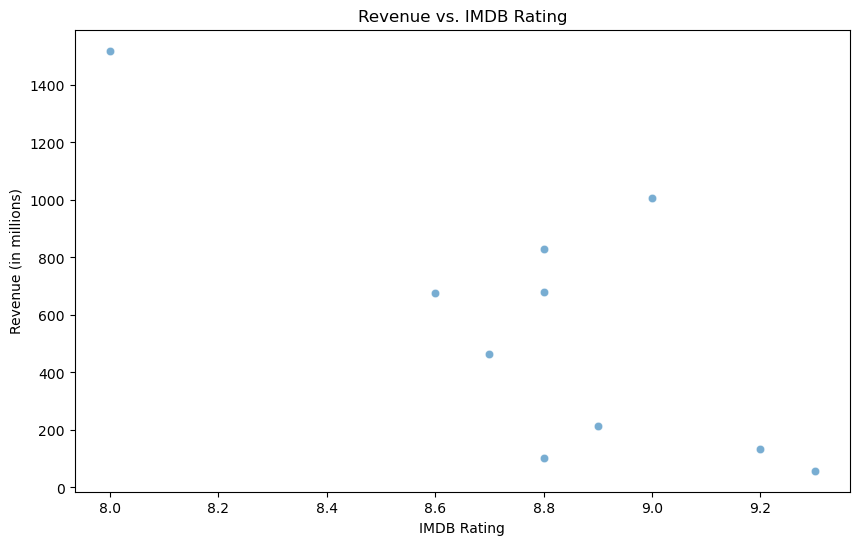

In [16]:
# Scatter plot to see the relationship between Revenue and IMDB Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB Rating', y='Revenue', data=df, alpha=0.6)
plt.title('Revenue vs. IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Revenue (in millions)')
plt.show()


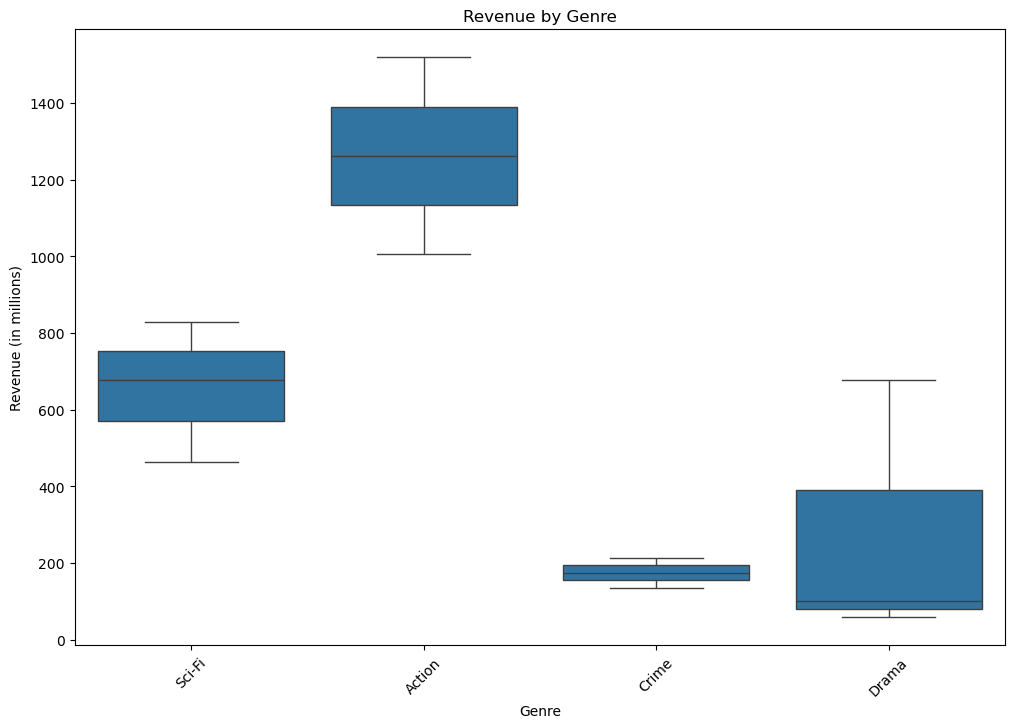

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Revenue', data=df)
plt.title('Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue (in millions)')
plt.xticks(rotation=45)
plt.show()


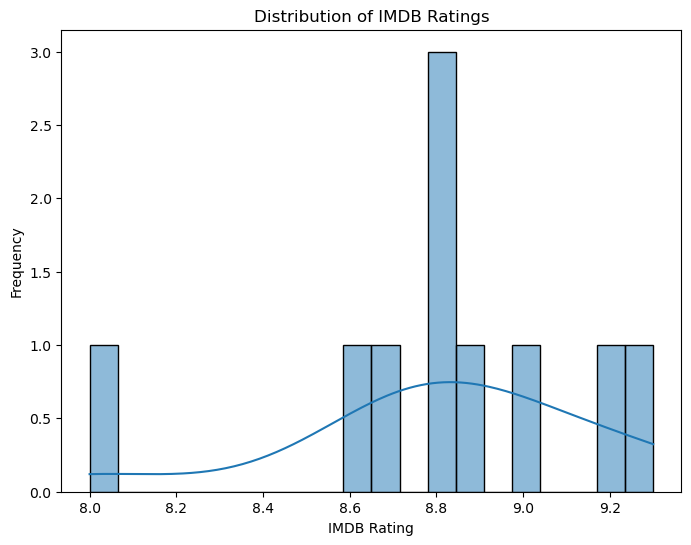

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df['IMDB Rating'], bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()


Correlation matrix:
             IMDB Rating   Revenue
IMDB Rating     1.000000 -0.759412
Revenue        -0.759412  1.000000


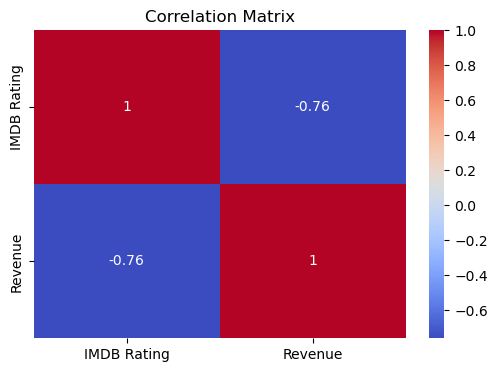

In [27]:
correlation_matrix = df[['IMDB Rating', 'Revenue']].corr()

print("Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
